### Basic imports

In [1015]:
import numpy as np
import io
import pandas as pd
import scipy
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
import xgboost as xgb

### Upload and read the csv

In [1016]:
file='parcoursup.csv'
df = pd.read_csv(file,';')

## Visualize the data

In [1017]:
df

,Session,"Statut de l’établissement de la filière de formation (public, privé…)",Code UAI de l'établissement,Établissement,Code départemental de l’établissement,Département de l’établissement,Région de l’établissement,Académie de l’établissement,Sélectivité,Filière de formation très agrégée,...,Regroupement 4 effectué par les formations pour les classements,Rang du dernier appelé du groupe 4,Regroupement 5 effectué par les formations pour les classements,Rang du dernier appelé du groupe 5,Indicateur Parcoursup du taux d’accès des candidats ayant postulé à la formation (ratio entre le dernier appelé et le dernier classé),Dont taux d’accès des candidats ayant un bac professionnel ayant postulé à la formation,Dont taux d’accès des candidats ayant un bac général ayant postulé à la formation,Dont taux d’accès des candidats ayant un bac technologique ayant postulé à la formation,tri,COD_AFF_FORM
0,2020,Public,0080918E,IFSI Charleville-Mezières,08,Ardennes,Grand Est,Reims,formation selective,IFSI,...,NaN,NaN,NaN,NaN,36.0,33.0,34.0,33.0,3_Autres formations,23217
1,2020,Public,0672341F,IFSI Strasbourg (Hus),67,Bas-Rhin,Grand Est,Strasbourg,formation selective,IFSI,...,NaN,NaN,NaN,NaN,28.0,12.0,70.0,18.0,3_Autres formations,23237
2,2020,Public,0672336A,IFSI de Saverne,67,Bas-Rhin,Grand Est,Strasbourg,formation selective,IFSI,...,NaN,NaN,NaN,NaN,38.0,15.0,38.0,48.0,3_Autres formations,23238
3,2020,Public,0672338C,IFSI Selestat,67,Bas-Rhin,Grand Est,Strasbourg,formation selective,IFSI,...,NaN,NaN,NaN,NaN,38.0,18.0,44.0,38.0,3_Autres formations,23240
4,2020,Public,0672981B,IFSI Erstein,67,Bas-Rhin,Grand Est,Strasbourg,formation selective,IFSI,...,NaN,NaN,NaN,NaN,36.0,13.0,45.0,43.0,3_Autres formations,23243
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12755,2020,Public,0480653Z,IFSI Lozérien,48,Lozère,Occitanie,Montpellier,formation selective,IFSI,...,NaN,NaN,NaN,NaN,20.0,13.0,54.0,33.0,3_Autres formations,23182
12756,2020,Public,0660570L,IFSI CH Perpignan,66,Pyrénées-Orientales,Occitanie,Montpellier,formation selective,IFSI,...,NaN,NaN,NaN,NaN,19.0,15.0,62.0,22.0,3_Autres formations,23183
12757,2020,Public,0881510N,IFSI Neufchateau,88,Vosges,Grand Est,Nancy-Metz,formation selective,IFSI,...,NaN,NaN,NaN,NaN,43.0,27.0,46.0,27.0,3_Autres formations,23197
12758,2020,Public,0851609M,IFSI CH LA ROCHE-SUR-YON,85,Vendée,Pays de la Loire,Nantes,formation selective,IFSI,...,NaN,NaN,NaN,NaN,29.0,27.0,49.0,25.0,3_Autres formations,23203


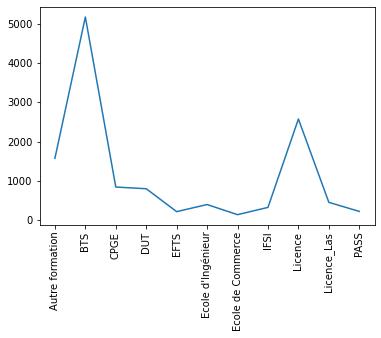

In [1018]:
y=df.groupby(["Filière de formation très agrégée"])["Établissement"].count()
plt.plot(y)
plt.xticks(rotation=90)
plt.show()

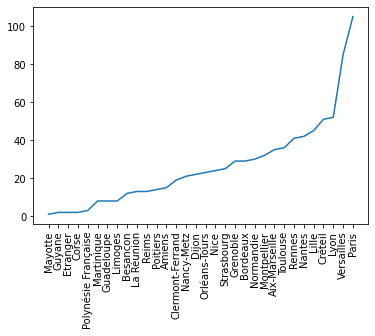

In [1019]:
CPGE = df.loc[df["Filière de formation très agrégée"]=="CPGE"]
acad = CPGE.groupby("Académie de l’établissement")["Établissement"].count()
acad = acad.sort_values()
plt.plot(acad)
plt.xticks(rotation=90)
plt.show()

## Clean the data

In [1020]:
df=df.drop(['Session', "Établissement", 'Département de l’établissement', 'Filière de formation détaillée', 
"Concours communs et banques d'épreuves", 'Filière de formation détaillée', 'Filière de formation très détaillée',
'Lien de la formation sur la plateforme Parcoursup', 'tri','Dont effectif des candidates admises', 
'Effectif des admis en phase principale','Dont effectif des admis boursiers néo bacheliers','Effectif des admis néo bacheliers',
'Effectif des admis néo bacheliers généraux','Effectif des admis néo bacheliers technologiques',
'Effectif des admis néo bacheliers professionnels','Dont effectif des admis néo bacheliers sans information sur la mention au bac',
'Dont effectif des admis néo bacheliers sans mention au bac','Dont effectif des admis néo bacheliers avec mention Assez Bien au bac',
'Dont effectif des admis néo bacheliers avec mention Bien au bac','Dont effectif des admis néo bacheliers avec mention Très Bien au bac',
'Effectif des admis néo bacheliers généraux ayant eu une mention au bac','Effectif des admis néo bacheliers technologiques ayant eu une mention au bac',
'Effectif des admis néo bacheliers professionnels ayant eu une mention au bac','Dont effectif des admis issus de la même académie',
'Dont effectif des admis issus de la même académie (Paris/Créteil/Versailles réunies)',"Code UAI de l'établissement",
'Dont effectif des admis issus du même établissement (BTS/CPGE)','Coordonnées GPS de la formation','Région de l’établissement',
'Filière de formation détaillée.1','Regroupement 1 effectué par les formations pour les classements',
"% d’admis néo bacheliers issus de la même académie (Paris/Créteil/Versailles réunies)"],axis=1)
print("Number of columns after first drop:", df.shape[1])

Number of columns after first drop: 83


In [1021]:
CPGE = df.loc[df["Filière de formation très agrégée"]=="CPGE"] #save this state for CPGE data
df.drop(['Filière de formation'],axis=1,inplace=True)
CPGE.drop(['Filière de formation très agrégée'],axis=1,inplace=True)

C:\Users\eliot\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


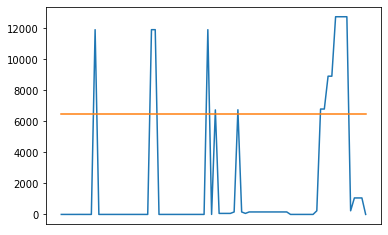

In [1022]:
plt.plot(df.isna().sum())
l=[6500 for i in range(df.shape[1])]
plt.plot(l)
ax = plt.gca()
ax.axes.xaxis.set_visible(False)
plt.show()
col=list(df.columns)

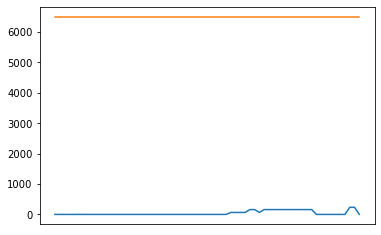

['Rang du dernier appelé du groupe 3', 'Rang du dernier appelé du groupe 4', 'Dont taux d’accès des candidats ayant un bac technologique ayant postulé à la formation', 'Dont taux d’accès des candidats ayant un bac général ayant postulé à la formation', 'Dont taux d’accès des candidats ayant un bac professionnel ayant postulé à la formation', 'Effectif des candidats classés par l’établissement hors internat (CPGE)', 'Regroupement 3 effectué par les formations pour les classements', 'Rang du dernier appelé du groupe 2', 'Rang du dernier appelé du groupe 5', 'Dont effectif des admis en internat', 'Effectif des candidats classés par l’établissement en internat (CPGE)', 'Regroupement 2 effectué par les formations pour les classements', 'Regroupement 5 effectué par les formations pour les classements', 'Regroupement 4 effectué par les formations pour les classements', 'Dont effectif des candidats ayant postulé en internat', '% d’admis néo bacheliers issus du même établissement (BTS/CPGE)', '

In [1023]:
df=df.dropna(axis=1,thresh=df.shape[0]-800)
y=df.isna().sum()
plt.plot(y)
plt.plot(l[:len(y)])
ax = plt.gca()
ax.axes.xaxis.set_visible(False)
plt.show()
dropped=list(set(col) - set(list(df.columns)))
print(dropped)

**Drop rows with remaining NA values**

In [1024]:
n=df.shape[0]
df=df.dropna()
print("numbers of dropped rows",n-df.shape[0]) 

numbers of dropped rows 365


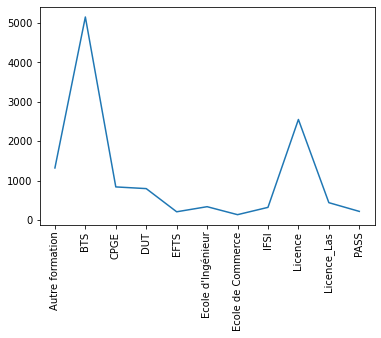

In [1025]:
y=df.groupby(["Filière de formation très agrégée"])["Code départemental de l’établissement"].count()
plt.plot(y)
plt.xticks(rotation=90)
plt.show()

**Repartition didn't change much, it seems ok**

### Taking care of non-numerical values

In [1026]:
df.replace('2A',20,inplace=True)
df.replace('2B',20,inplace=True)
df['Code départemental de l’établissement'] = df['Code départemental de l’établissement'].astype(int)

In [1027]:
target = df["Sélectivité"]
targ_cat = target.replace('formation non selec', 0)
targ_cat = targ_cat.replace('formation selective', 1)
df["Sélectivité"] = targ_cat
df["Sélectivité"] = df["Sélectivité"].astype(int)

In [1028]:
target = df['Statut de l’établissement de la filière de formation (public, privé…)']
targ_cat = target.replace('Public', 0)
targ_cat = targ_cat.replace("Privé sous contrat d'association", 1)
targ_cat = targ_cat.replace("Privé enseignement supérieur", 1)
targ_cat = targ_cat.replace("Privé hors contrat", 1)
df['Statut de l’établissement de la filière de formation (public, privé…)'] = targ_cat
df['Statut de l’établissement de la filière de formation (public, privé…)'] = df['Statut de l’établissement de la filière de formation (public, privé…)'].astype(int)

In [1029]:
df=df.join(pd.get_dummies(df['Filière de formation très agrégée'], prefix='Fil'))
df.drop('Filière de formation très agrégée',inplace=True,axis=1)
df=df.join(pd.get_dummies(df['Académie de l’établissement'], prefix='Acad'))
df.drop('Académie de l’établissement',inplace=True,axis=1)

In [1030]:
#To see if there is non-numerical column left
col=list(df.columns)
dfnnum = df.select_dtypes(include=np.number)
ncol=list(dfnnum.columns)
textcol =list(set(col) - set(list(ncol)))
print(textcol)

[]


In [1031]:
print("Final global dataset size", df.shape)

Final global dataset size (12395, 106)


### Same but for CPGE

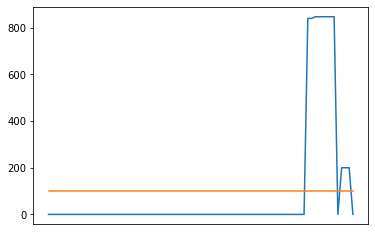

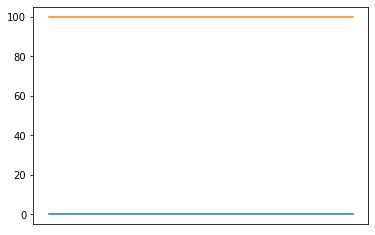

['Rang du dernier appelé du groupe 3', 'Rang du dernier appelé du groupe 4', 'Dont taux d’accès des candidats ayant un bac technologique ayant postulé à la formation', 'Dont taux d’accès des candidats ayant un bac général ayant postulé à la formation', 'Regroupement 3 effectué par les formations pour les classements', 'Rang du dernier appelé du groupe 2', 'Rang du dernier appelé du groupe 5', 'Regroupement 2 effectué par les formations pour les classements', 'Regroupement 5 effectué par les formations pour les classements', 'Regroupement 4 effectué par les formations pour les classements', 'Dont taux d’accès des candidats ayant un bac professionnel ayant postulé à la formation']


In [1032]:
plt.plot(CPGE.isna().sum())
l=[100 for i in range(CPGE.shape[1])]
plt.plot(l)
ax = plt.gca()
ax.axes.xaxis.set_visible(False)
plt.show()
plt.close()
col=list(CPGE.columns)
CPGE=CPGE.dropna(axis=1,thresh=CPGE.shape[0]-100)
y=CPGE.isna().sum()
plt.plot(y)
plt.plot(l[:len(y)])
ax = plt.gca()
ax.axes.xaxis.set_visible(False)
plt.show()
dropped=list(set(col) - set(list(CPGE.columns)))
print(dropped)

In [1033]:
CPGE.replace('2A',20,inplace=True)
CPGE.replace('2B',20,inplace=True)
CPGE['Code départemental de l’établissement'] = CPGE['Code départemental de l’établissement'].astype(int)

In [1034]:
target = CPGE["Sélectivité"]
targ_cat = target.replace('formation non selec', 0)
targ_cat = targ_cat.replace('formation selective', 1)
CPGE["Sélectivité"] = targ_cat
CPGE["Sélectivité"] = CPGE["Sélectivité"].astype(int)

In [1035]:
target = CPGE['Statut de l’établissement de la filière de formation (public, privé…)']
targ_cat = target.replace('Public', 0)
targ_cat = targ_cat.replace("Privé sous contrat d'association", 1)
targ_cat = targ_cat.replace("Privé enseignement supérieur", 1)
targ_cat = targ_cat.replace("Privé hors contrat", 1)
CPGE['Statut de l’établissement de la filière de formation (public, privé…)'] = targ_cat
CPGE['Statut de l’établissement de la filière de formation (public, privé…)'] = CPGE['Statut de l’établissement de la filière de formation (public, privé…)'].astype(int)

In [1036]:
CPGE=CPGE.join(pd.get_dummies(CPGE['Filière de formation'], prefix='Fil'))
CPGE.drop('Filière de formation',inplace=True,axis=1)
CPGE=CPGE.join(pd.get_dummies(CPGE['Académie de l’établissement'], prefix='Acad'))
CPGE.drop('Académie de l’établissement',inplace=True,axis=1)

In [1037]:
#To see if there is non-numerical column left
col=list(CPGE.columns)
dfnnum = CPGE.select_dtypes(include=np.number)
ncol=list(dfnnum.columns)
textcol =list(set(col) - set(list(ncol)))
print(textcol)

[]


In [1038]:
print("Final CPGE dataset size", CPGE.shape)

Final CPGE dataset size (847, 104)


## Train and Test set

In [1039]:
df_train,df_test = sklearn.model_selection.train_test_split(df,train_size=0.85,random_state = 60)
CPGE_train,CPGE_test = sklearn.model_selection.train_test_split(CPGE,train_size=0.85,random_state = 60)

In [1040]:
global_Y_test=df_test["% d’admis néo bacheliers issus de la même académie"]
global_X_test=df_test.drop("% d’admis néo bacheliers issus de la même académie",axis=1)
global_Y_train=df_train["% d’admis néo bacheliers issus de la même académie"]
global_X_train=df_train.drop("% d’admis néo bacheliers issus de la même académie",axis=1)

CPGE_Y_test=CPGE_test["% d’admis néo bacheliers issus de la même académie"]
CPGE_X_test=CPGE_test.drop("% d’admis néo bacheliers issus de la même académie",axis=1)
CPGE_Y_train=CPGE_train["% d’admis néo bacheliers issus de la même académie"]
CPGE_X_train=CPGE_train.drop("% d’admis néo bacheliers issus de la même académie",axis=1)

## K-nearest neighbors

In [1041]:
knn = KNeighborsRegressor(weights='distance')
knn.fit(global_X_train, np.array(global_Y_train))
global_Y_pred = knn.predict(global_X_test)

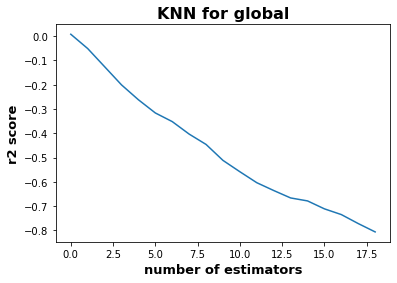

In [1042]:
y_vals = []
for i in range(1, 20):
    knn = KNeighborsRegressor(n_neighbors=i,weights='distance')
    knn.fit(global_X_train, np.array(global_Y_train))
    global_Y_pred = knn.predict(global_X_test)
    y_vals.append(r2_score(global_Y_pred, global_Y_test))
plt.title('KNN for global',fontsize=16,fontweight='bold')
plt.xlabel('number of estimators',fontsize=13, fontweight='bold')
plt.ylabel('r2 score',fontsize=13, fontweight='bold')
plt.plot(y_vals);
plt.show()

In [1043]:
r2_score(global_Y_pred, global_Y_test)

-0.806198994035618

In [1044]:
knn = KNeighborsRegressor(weights='distance')
knn.fit(CPGE_X_train, np.array(CPGE_Y_train))
CPGE_Y_pred = knn.predict(CPGE_X_test)

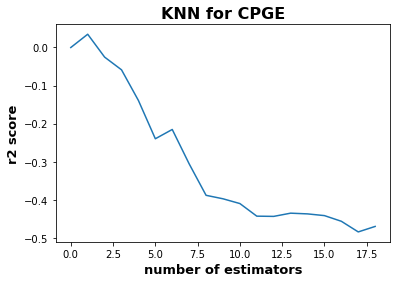

In [1045]:
y_vals = []
for i in range(1, 20):
    knn = KNeighborsRegressor(n_neighbors=i,weights='distance')
    knn.fit(CPGE_X_train, np.array(CPGE_Y_train))
    CPGE_Y_pred = knn.predict(CPGE_X_test)
    y_vals.append(r2_score(CPGE_Y_pred, CPGE_Y_test))
plt.title('KNN for CPGE',fontsize=16,fontweight='bold')
plt.xlabel('number of estimators',fontsize=13, fontweight='bold')
plt.ylabel('r2 score',fontsize=13, fontweight='bold')
plt.plot(y_vals);
plt.show()

In [1046]:
r2_score(CPGE_Y_pred, CPGE_Y_test)

-0.47015790459471374

## DecisionTree

In [1047]:
dt= DecisionTreeRegressor()
dt.fit(global_X_train, np.array(global_Y_train))
global_Y_pred = dt.predict(global_X_test)
r2_score(global_Y_pred, global_Y_test)

0.06208099906203224

In [1048]:
dt= DecisionTreeRegressor()
dt.fit(CPGE_X_train, np.array(CPGE_Y_train))
CPGE_Y_pred = dt.predict(CPGE_X_test)
r2_score(CPGE_Y_pred, CPGE_Y_test)

0.48873659976941464

## RandomForest

In [1049]:
rf = RandomForestRegressor()
rf.fit(global_X_train, np.array(global_Y_train))
global_Y_pred = rf.predict(global_X_test)
r2_score(global_Y_pred, global_Y_test)

0.0493436911650611

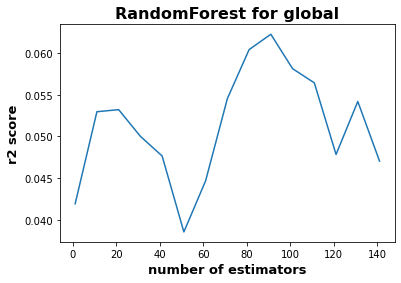

In [1050]:
y_vals = []
l=[i for i in range(1,151,10)]
for i in l:
    rf= RandomForestRegressor(n_estimators=i)
    rf.fit(global_X_train, np.array(global_Y_train))
    global_Y_pred = rf.predict(global_X_test)
    y_vals.append(r2_score(global_Y_pred, global_Y_test))
plt.title('RandomForest for global',fontsize=16,fontweight='bold')
plt.xlabel('number of estimators',fontsize=13, fontweight='bold')
plt.ylabel('r2 score',fontsize=13, fontweight='bold')
plt.plot(l,y_vals);
plt.show()

In [1051]:
rf= RandomForestRegressor()
rf.fit(CPGE_X_train, np.array(CPGE_Y_train))
CPGE_Y_pred = rf.predict(CPGE_X_test)
r2_score(CPGE_Y_pred, CPGE_Y_test)

0.4902289263519587

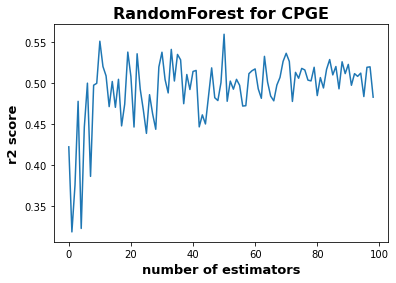

In [1052]:
y_vals = []
for i in range(1,100):
    rf= RandomForestRegressor(n_estimators=i)
    rf.fit(CPGE_X_train, np.array(CPGE_Y_train))
    CPGE_Y_pred = rf.predict(CPGE_X_test)
    y_vals.append(r2_score(CPGE_Y_pred, CPGE_Y_test))
plt.title('RandomForest for CPGE',fontsize=16,fontweight='bold')
plt.xlabel('number of estimators',fontsize=13, fontweight='bold')
plt.ylabel('r2 score',fontsize=13, fontweight='bold')
plt.plot(y_vals);
plt.show()

## Gradient Boosting

In [1064]:
xg = xgb.XGBRegressor(n_estimators=3000)
xg.fit(global_X_train, np.array(global_Y_train))
global_Y_pred = xg.predict(global_X_test)
r2_score(global_Y_pred, global_Y_test)

0.30430270760085276

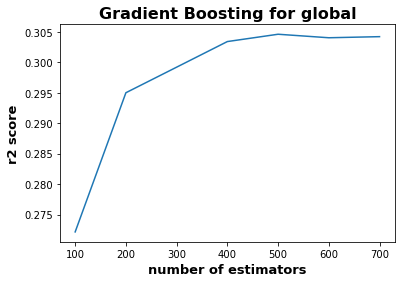

In [1054]:
y_vals = []
l=[i for i in range(100,701,100)]
for i in l:
    xg = xgb.XGBRegressor(n_estimators=i)
    xg.fit(global_X_train, np.array(global_Y_train))
    global_Y_pred = xg.predict(global_X_test)
    y_vals.append(r2_score(global_Y_pred, global_Y_test))
plt.title('Gradient Boosting for global',fontsize=16,fontweight='bold')
plt.xlabel('number of estimators',fontsize=13, fontweight='bold')
plt.ylabel('r2 score',fontsize=13, fontweight='bold')
plt.plot(l,y_vals);
plt.show()

In [1055]:
xg = xgb.XGBRegressor(n_estimators=100)
xg.fit(CPGE_X_train, np.array(CPGE_Y_train))
CPGE_Y_pred = xg.predict(CPGE_X_test)
r2_score(CPGE_Y_pred, CPGE_Y_test)

0.6451107330189476

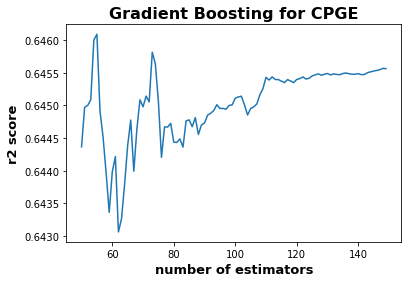

In [1056]:
y_vals = []
l=[i for i in range(50,150)]
for i in l:
    xg = xgb.XGBRegressor(n_estimators=i)
    xg.fit(CPGE_X_train, np.array(CPGE_Y_train))
    CPGE_Y_pred = xg.predict(CPGE_X_test)
    y_vals.append(r2_score(CPGE_Y_pred, CPGE_Y_test))
plt.title('Gradient Boosting for CPGE',fontsize=16,fontweight='bold')
plt.xlabel('number of estimators',fontsize=13, fontweight='bold')
plt.ylabel('r2 score',fontsize=13, fontweight='bold')
plt.plot(l,y_vals);
plt.show()
